# Particle Swarm Optimization

In this report, we analyse the performance of the Particle Swarm Optimization (PSO) algorithm for optimizing the Sphere, Rastringin and Ackley functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pso import PSO
from functions import sphere, rastringin, ackley

## Swarm size

In this section, we analyse the impact of the swarm size for optimizing each function. The number of particles is set from 30 to 100, in steps of 10. Mean and Standard Deviation are obtained by repeating each experiment 30 times.

### Sphere

In [2]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_results = []
sphere_particle_number = []

# varying the number of particles
for n in range(30, 101, 10):
    pso = PSO(sphere, bounds, num_particles=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution, _ = pso.run()
        results.append(execution)
        
    sphere_particle_number.append(n)
    sphere_results.append(results)

#for n, r in zip(sphere_particle_number, sphere_results):
#    print(n, ":", np.average(r))

### Rastringin

In [3]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_results = []
rastringin_particle_number = []

# varying the number of particles
for n in range(30, 101, 10):
    pso = PSO(rastringin, bounds, num_particles=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution, _ = pso.run()
        results.append(execution)
    
    rastringin_particle_number.append(n)
    rastringin_results.append(results)

#for n, r in zip(rastringin_particle_number, rastringin_results):
#    print(n, ":", np.average(r))

### Ackley

In [4]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_results = []
ackley_particle_number = []

# varying the number of particles
for n in range(30, 101, 10):
    pso = PSO(ackley, bounds, num_particles=n)
    results = []
    # executing algorithm 30 times
    for i in range(30):
        execution, _ = pso.run()
        results.append(execution)
    
    ackley_particle_number.append(n)
    ackley_results.append(results)
    
#for n, r in zip(ackley_particle_number, ackley_results):
#    print(n, ":", np.average(r))

### Results

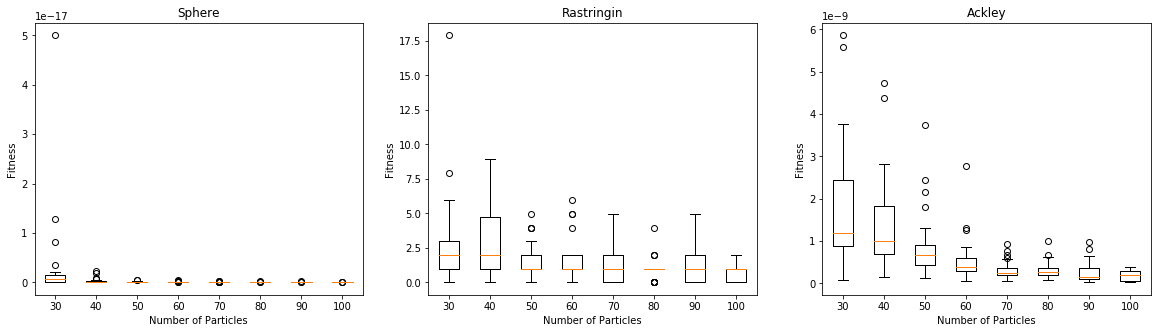

In [5]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.boxplot(sphere_results)
plt.xticks(range(1, len(sphere_results) + 1), sphere_particle_number)
plt.title('Sphere')
plt.ylabel("Fitness")
plt.xlabel("Number of Particles")

plt.subplot(1, 3, 2)
plt.boxplot(rastringin_results)
plt.xticks(range(1, len(rastringin_results) + 1), rastringin_particle_number)
plt.title('Rastringin')
plt.ylabel("Fitness")
plt.xlabel("Number of Particles")

plt.subplot(1, 3, 3)
plt.boxplot(ackley_results)
plt.xticks(range(1, len(ackley_results) + 1), ackley_particle_number)
plt.title('Ackley')
plt.ylabel("Fitness")
plt.xlabel("Number of Particles")

plt.show()

### Discussion

With the **sphere** function, we notice that the fitness is inversely proportional to the number of particles, as well as to the number of outliers. Moreover, all the results have a magnitude lesser than 1e-17. From 70 or 80 particles onward, the difference in the results is negligible. 

For the **rastringin** function, PSO haven't attained results as good as with the sphere. From 50 particles onward, the results are roughly the same, as the averages are equivalent.

With **ackley**, the decreasing tendency is once again clear. Besides the average decrease, the variance between the experiments also is reduces, indicating better results overall.

The experiments suggest that a larger particle number can lead to better fitness values. A hypothesis is that with more particles, more of the objective function is covered, leading to a greater chance of finding a global optimum. However, as the **rastringin** results suggests, a function with numerous local optima can not be benefited from a bigger number of particles.

## Inertia value

In this section, we analyse the impact of the inertia value for optimizing each function. The inertia weight is set from 0.1 to 0.9, in steps of 10. Mean and Standard Deviation are obtained by repeating each experiment 30 times.

### Sphere

In [6]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_results = []
sphere_inertia_value = []

# variando o número de partículas
for n in np.arange(0.1, 0.91, 0.1):
    pso = PSO(sphere, bounds, inertia=n)
    results = []
    # executando o algoritmo 30 vezes
    for i in range(30):
        execution, _ = pso.run()
        results.append(execution)
        
    sphere_inertia_value.append(n)
    sphere_results.append(results)

### Rastringin

In [7]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_results = []
rastringin_inertia_value = []

# variando o número de partículas
for n in np.arange(0.1, 0.91, 0.1):
    pso = PSO(rastringin, bounds,inertia=n)
    results = []
    # executando o algoritmo 30 vezes
    for i in range(30):
        execution, _ = pso.run()
        results.append(execution)
    
    rastringin_inertia_value.append(n)
    rastringin_results.append(results)

### Ackley

In [8]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_results = []
ackley_inertia_value = []

# variando o número de partículas
for n in np.arange(0.1, 0.91, 0.1):
    pso = PSO(ackley, bounds,inertia=n)    
    results = []
    # executando o algoritmo 30 vezes
    for i in range(30):
        execution, _ = pso.run()
        results.append(execution)
    
    ackley_inertia_value.append(n)
    ackley_results.append(results)

### Results

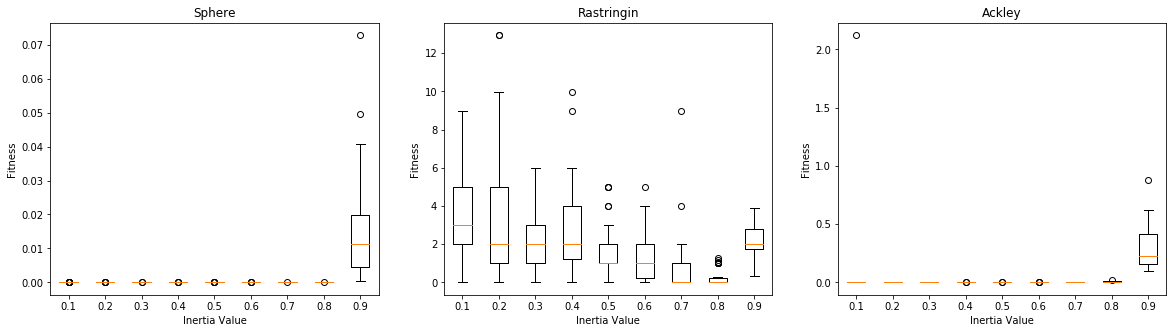

In [9]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
plt.boxplot(sphere_results)
plt.xticks(range(1, len(sphere_results) + 1), np.around(sphere_inertia_value,1))
plt.title('Sphere')
plt.ylabel("Fitness")
plt.xlabel("Inertia Value")

plt.subplot(1, 3, 2)
plt.boxplot(rastringin_results)
plt.xticks(range(1, len(rastringin_results) + 1), np.around(rastringin_inertia_value,1))
plt.title('Rastringin')
plt.ylabel("Fitness")
plt.xlabel("Inertia Value")

plt.subplot(1, 3, 3)
plt.boxplot(ackley_results)
plt.xticks(range(1, len(ackley_results) + 1), np.around(ackley_inertia_value,1))
plt.title('Ackley')
plt.ylabel("Fitness")
plt.xlabel("Inertia Value")

plt.show()

### Discussion

For the **sphere** and **ackley** functions, the algorithm obtained its best results with inertia weights between 0.1 and 0.8. With 0.9, the fitness deteriorated. With **sphere** this transition is abrupt, as with **ackley** there is a slow development.

With **rastringin**, there is a decreasing tendency in fitness average as inertia vary from 0.1 to 0.8, but once again an inertia weight of 0.9 lead to worse results. 

The experiments show that some functions like **sphere** and **ackley** do not get any benefit from inertia values larger than 0.1, yet, show worse results for a value of 0.9. On the other hand, **rastringin** sees some benefits of increasing the inertia from 0.1 to 0.8, but once again is impaired by a value of 0.9. A hypothesis is that in functions with multiple pronounced local optima such as **rastringin**, inertia can help the particles not to get stuck on those optima, while in **ackley** (where the local optima are less pronounced) or **sphere** this does not help much.

## Global vs local topology

In this section, we analyse the impact of a global vs a local topology of 2 neighbours for each function. We compare the fitness progression through the algorithm iterations for each strategy. Mean and Standard Deviation are obtained by repeating each experiment 30 times.

In [ ]:
num_iter = 100
num_exec = 30
x = np.arange(1, num_iter + 1, 1) # iteration number array

### Sphere

In [ ]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_best_fitnesses_g = []
sphere_best_fitnesses_l = []
sphere_iter_results_g = [[] for i in range(num_iter)]
sphere_iter_results_l = [[] for i in range(num_iter)]
sphere_iter_mean_g = []
sphere_iter_mean_l = []
sphere_iter_std_g = []
sphere_iter_std_l = []

# executing global topology algorithm 30 times
pso_g = PSO(sphere, bounds, num_particles=50, maxiter=num_iter)

for i in range(num_exec):
    _, execution_best_fitnesses_g = pso_g.run()
    sphere_best_fitnesses_g.append(execution_best_fitnesses_g)
    
# executing local topology algorithm 30 times
pso_l = PSO(sphere, bounds, num_particles=50, maxiter=num_iter, num_neighbors=2)

for i in range(num_exec):
    _, execution_best_fitnesses_l = pso_l.run()
    sphere_best_fitnesses_l.append(execution_best_fitnesses_l)

# grouping results by iteration number
for i in range(len(sphere_best_fitnesses_g)):
    for j in range(len(sphere_best_fitnesses_g[i])):
        sphere_iter_results_g[j].append(sphere_best_fitnesses_g[i][j])
        sphere_iter_results_l[j].append(sphere_best_fitnesses_l[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(sphere_iter_results_g)):
    sphere_iter_mean_g.append(np.mean(sphere_iter_results_g[i]))
    sphere_iter_std_g.append(np.std(sphere_iter_results_g[i]))
    
    sphere_iter_mean_l.append(np.mean(sphere_iter_results_l[i]))
    sphere_iter_std_l.append(np.std(sphere_iter_results_l[i]))

### Results - Sphere

In [ ]:
plt.figure(figsize=(16, 9))
plt.ylim(-0.5, 5) 
plt.errorbar(x, np.array(sphere_iter_mean_g), np.array(sphere_iter_std_g), ms=7, lw=2.5, marker="o", \
             capsize=3, ecolor="black", elinewidth=0.7,label='Global')
plt.errorbar(x, np.array(sphere_iter_mean_l), np.array(sphere_iter_std_l), ms=7, lw=2.5, ls='--', \
             marker="s", capsize=3, color="r",ecolor="r", elinewidth=0.7,label='Local')
plt.title('Sphere - Global x Local')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 16})

plt.show() 

### Rastringin

In [ ]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_best_fitnesses_g = []
rastringin_best_fitnesses_l = []
rastringin_iter_results_g = [[] for i in range(num_iter)]
rastringin_iter_results_l = [[] for i in range(num_iter)]
rastringin_iter_mean_g = []
rastringin_iter_mean_l = []
rastringin_iter_std_g = []
rastringin_iter_std_l = []

# executing global topology algorithm 30 times
pso_g = PSO(rastringin, bounds, num_particles=50, maxiter=num_iter)

for i in range(num_exec):
    _, execution_best_fitnesses_g = pso_g.run()
    rastringin_best_fitnesses_g.append(execution_best_fitnesses_g)
    
# executing local topology algorithm 30 times
pso_l = PSO(rastringin, bounds, num_particles=50, maxiter=num_iter, num_neighbors=2)

for i in range(num_exec):
    _, execution_best_fitnesses_l = pso_l.run()
    rastringin_best_fitnesses_l.append(execution_best_fitnesses_l)

# grouping results by iteration number
for i in range(len(rastringin_best_fitnesses_g)):
    for j in range(len(rastringin_best_fitnesses_g[i])):
        rastringin_iter_results_g[j].append(rastringin_best_fitnesses_g[i][j])
        rastringin_iter_results_l[j].append(rastringin_best_fitnesses_l[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(rastringin_iter_results_g)):
    rastringin_iter_mean_g.append(np.mean(rastringin_iter_results_g[i]))
    rastringin_iter_std_g.append(np.std(rastringin_iter_results_g[i]))
    
    rastringin_iter_mean_l.append(np.mean(rastringin_iter_results_l[i]))
    rastringin_iter_std_l.append(np.std(rastringin_iter_results_l[i]))

### Results - Rastringin

In [ ]:
plt.figure(figsize=(20, 15))
plt.ylim(-1, 26)  
plt.errorbar(x, np.array(rastringin_iter_mean_g), np.array(rastringin_iter_std_g), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7,label='Global')
plt.errorbar(x, np.array(rastringin_iter_mean_l), np.array(rastringin_iter_std_l), ms=7, lw=2.5,ls='--', marker="s", capsize=4, color="r",ecolor="r", elinewidth=0.7,label='Local')
plt.title('Rastringin - Global X Local')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 20})

plt.show()

### Ackley

In [ ]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_best_fitnesses_g = []
ackley_best_fitnesses_l = []
ackley_iter_results_g = [[] for i in range(num_iter)]
ackley_iter_results_l = [[] for i in range(num_iter)]
ackley_iter_mean_g = []
ackley_iter_mean_l = []
ackley_iter_std_g = []
ackley_iter_std_l = []

# executing global topology algorithm 30 times
pso_g = PSO(ackley, bounds, num_particles=50, maxiter=num_iter)

for i in range(num_exec):
    _, execution_best_fitnesses_g = pso_g.run()
    ackley_best_fitnesses_g.append(execution_best_fitnesses_g)
    
# executing local topology algorithm 30 times
pso_l = PSO(ackley, bounds, num_particles=50, maxiter=num_iter, num_neighbors=2)

for i in range(num_exec):
    _, execution_best_fitnesses_l = pso_l.run()
    ackley_best_fitnesses_l.append(execution_best_fitnesses_l)

# grouping results by iteration number
for i in range(len(ackley_best_fitnesses_g)):
    for j in range(len(ackley_best_fitnesses_g[i])):
        ackley_iter_results_g[j].append(ackley_best_fitnesses_g[i][j])
        ackley_iter_results_l[j].append(ackley_best_fitnesses_l[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(ackley_iter_results_g)):
    ackley_iter_mean_g.append(np.mean(ackley_iter_results_g[i]))
    ackley_iter_std_g.append(np.std(ackley_iter_results_g[i]))
    
    ackley_iter_mean_l.append(np.mean(ackley_iter_results_l[i]))
    ackley_iter_std_l.append(np.std(ackley_iter_results_l[i]))

### Results - Ackley

In [ ]:
plt.figure(figsize=(20, 15))
plt.ylim(-0.5, 6)  
plt.errorbar(x, np.array(ackley_iter_mean_g), np.array(ackley_iter_std_g), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7,label='Global')
plt.errorbar(x, np.array(ackley_iter_mean_l), np.array(ackley_iter_std_l), ms=7, lw=2.5,ls='--', marker="s", capsize=4, color="r",ecolor="r", elinewidth=0.7,label='Local')
plt.title('Ackley - Global X Local')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 20})

plt.show()

## Variar a fórmula de atualização da velocidade entre as opções: tradicional e com fator de restrição.
* Mostrar resultado em um gráfico com número de iteração vs. melhor fitness encontrado
* Terão duas séries neste gráfico
* Cada ponto da série deverá apresentar a média dos 30 execuções e uma barra de erro (exemplo).

In [ ]:
num_iter=100
num_exec=30
x = np.arange(1, num_iter+1, 1) # iteration number array

### Sphere

In [ ]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

sphere_best_fitnesses_k = []
sphere_best_fitnesses_w = []
sphere_iter_results_k = [[] for i in range(num_iter)]
sphere_iter_results_w = [[] for i in range(num_iter)]
sphere_iter_mean_k = []
sphere_iter_mean_w = []
sphere_iter_std_k = []
sphere_iter_std_w = []

# executing constricted velocity algorithm 30 times
pso_k = PSO(sphere, bounds, num_particles=50, maxiter=num_iter,constriction=1)

for i in range(num_exec):
    _, execution_best_fitnesses_k = pso_k.run()
    sphere_best_fitnesses_k.append(execution_best_fitnesses_k)
    
# executing inertia topology algorithm 30 times
pso_w = PSO(sphere, bounds, num_particles=50, maxiter=num_iter, constriction=0)

for i in range(num_exec):
    _, execution_best_fitnesses_w = pso_w.run()
    sphere_best_fitnesses_w.append(execution_best_fitnesses_w)

# grouping results by iteration number
for i in range(len(sphere_best_fitnesses_k)):
    for j in range(len(sphere_best_fitnesses_k[i])):
        sphere_iter_results_k[j].append(sphere_best_fitnesses_k[i][j])
        sphere_iter_results_w[j].append(sphere_best_fitnesses_w[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(sphere_iter_results_w)):
    sphere_iter_mean_k.append(np.mean(sphere_iter_results_k[i]))
    sphere_iter_std_k.append(np.std(sphere_iter_results_k[i]))
    
    sphere_iter_mean_w.append(np.mean(sphere_iter_results_w[i]))
    sphere_iter_std_w.append(np.std(sphere_iter_results_w[i]))

In [ ]:
plt.figure(figsize=(20, 15))
plt.ylim(-0.5, 5)  
plt.errorbar(x, np.array(sphere_iter_mean_k), np.array(sphere_iter_std_k), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7,label='Constricted')
plt.errorbar(x, np.array(sphere_iter_mean_w), np.array(sphere_iter_std_w), ms=7, lw=2.5,ls='--', marker="s", capsize=4, color="r",ecolor="r", elinewidth=0.7,label='Inertia')
plt.title('Sphere - Constricted X Inertia')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 20})

plt.show() 

### Rastringin

In [ ]:
bounds = [(-5.12, 5.12), (-5.12, 5.12), (-5.12, 5.12)]

rastringin_best_fitnesses_k = []
rastringin_best_fitnesses_w = []
rastringin_iter_results_k = [[] for i in range(num_iter)]
rastringin_iter_results_w = [[] for i in range(num_iter)]
rastringin_iter_mean_k = []
rastringin_iter_mean_w = []
rastringin_iter_std_k = []
rastringin_iter_std_w = []

# executing constricted velocity algorithm 30 times
pso_k = PSO(rastringin,bounds, num_particles=50, maxiter=num_iter,constriction=True)

for i in range(num_exec):
    _, execution_best_fitnesses_k = pso_k.run()
    rastringin_best_fitnesses_k.append(execution_best_fitnesses_k)
    
# executing inertia algorithm 30 times
pso_w = PSO(rastringin, bounds, num_particles=50, maxiter=num_iter, constriction=False)

for i in range(num_exec):
    _, execution_best_fitnesses_w = pso_w.run()
    rastringin_best_fitnesses_w.append(execution_best_fitnesses_w)

# grouping results by iteration number
for i in range(len(rastringin_best_fitnesses_k)):
    for j in range(len(rastringin_best_fitnesses_k[i])):
        rastringin_iter_results_k[j].append(rastringin_best_fitnesses_k[i][j])
        rastringin_iter_results_w[j].append(rastringin_best_fitnesses_w[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(rastringin_iter_results_w)):
    rastringin_iter_mean_k.append(np.mean(rastringin_iter_results_k[i]))
    rastringin_iter_std_k.append(np.std(rastringin_iter_results_k[i]))
    
    rastringin_iter_mean_w.append(np.mean(rastringin_iter_results_w[i]))
    rastringin_iter_std_w.append(np.std(rastringin_iter_results_w[i]))

In [ ]:
plt.figure(figsize=(20, 15))
plt.ylim(-0.5, 25)  
plt.errorbar(x, np.array(rastringin_iter_mean_k), np.array(rastringin_iter_std_k), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7,label='Constricted')
plt.errorbar(x, np.array(rastringin_iter_mean_w), np.array(rastringin_iter_std_w), ms=7, lw=2.5,ls='--', marker="s", capsize=4, color="r",ecolor="r", elinewidth=0.7,label='Inertia')
plt.title('Rastringin - Constricted X Inertia')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 20})

plt.show() 

### Ackley

In [ ]:
bounds = [(-5, 5), (-5, 5), (-5, 5)]

ackley_best_fitnesses_k = []
ackley_best_fitnesses_w = []
ackley_iter_results_k = [[] for i in range(num_iter)]
ackley_iter_results_w = [[] for i in range(num_iter)]
ackley_iter_mean_k = []
ackley_iter_mean_w = []
ackley_iter_std_k = []
ackley_iter_std_w = []

# executing constricted velocity algorithm 30 times
pso_k = PSO(ackley,bounds, num_particles=50, maxiter=num_iter,constriction=1)

for i in range(num_exec):
    _, execution_best_fitnesses_k = pso_k.run()
    ackley_best_fitnesses_k.append(execution_best_fitnesses_k)
    
# executing local topology algorithm 30 times
pso_w = PSO(ackley, bounds, num_particles=50, maxiter=num_iter, constriction=0)

for i in range(num_exec):
    _, execution_best_fitnesses_w = pso_w.run()
    ackley_best_fitnesses_w.append(execution_best_fitnesses_w)

# grouping results by iteration number
for i in range(len(ackley_best_fitnesses_k)):
    for j in range(len(ackley_best_fitnesses_k[i])):
        ackley_iter_results_k[j].append(ackley_best_fitnesses_k[i][j])
        ackley_iter_results_w[j].append(ackley_best_fitnesses_w[i][j])
        
# calculating mean and std values by iteration number
for i in range(len(ackley_iter_results_w)):
    ackley_iter_mean_k.append(np.mean(ackley_iter_results_k[i]))
    ackley_iter_std_k.append(np.std(ackley_iter_results_k[i]))
    
    ackley_iter_mean_w.append(np.mean(ackley_iter_results_w[i]))
    ackley_iter_std_w.append(np.std(ackley_iter_results_w[i]))

In [ ]:
plt.figure(figsize=(20, 15))

plt.ylim(-0.5, 7)  
plt.errorbar(x, np.array(ackley_iter_mean_k), np.array(ackley_iter_std_k), ms=7, lw=2.5, marker="o", capsize=4, ecolor="black", elinewidth=0.7,label='Constricted')
plt.errorbar(x, np.array(ackley_iter_mean_w), np.array(ackley_iter_std_w), ms=7, lw=2.5,ls='--', marker="s", capsize=4, color="r",ecolor="r", elinewidth=0.7,label='Inertia')
plt.title('Ackley - Constricted X Inertia')
plt.ylabel("Fitness")
plt.xlabel("Iteration")
plt.legend(loc='upper right',prop={'size': 20})

plt.show() 